### Introduction

Diabetes is a chronic condition involving the dysregulation of blood glucose due to either decreased insulin production or decreased insulin sensitivity, often referred to respectively as type 1 or type 2. Instances of type 2 diabetes increase with the presence of comorbidities, such elevated blood pressure and BMI, as well as a family history of the condition. This project will explore the correlation between diabetes and these factors.

`diabetes.csv` contains a subset of observations collected from a larger database generated by the National Institute of Diabetes and Digestive and Kidney Diseases. Only data belonging to those who were female, of Pima Indian heritage, and were ≥21 years of age were included.

The dataset has the following variables:
* `Pregnancies` – number of pregnancies
* `Glucose` – blood glucose level (mg/dL)
* `BloodPressure` – diastolic blood pressure (mm/Hg)
* `SkinThickness` – triceps skinfold thickness (mm)
* `Insulin` – insulin level in the blood (IU/mL)
* `BMI` – body mass index (kg/m2)
* `DiabetesPedigreeFunction` – likelihood of diabetes based on family history
* `Age` 
* `Outcome` – whether or not the individual has diabetes (1 = yes, 0 = no)

We will investigate if it is possible to predict the outcome (if an individual has diabetes or not) when given the other variables in the dataset. 

### Preliminary Data Analysis

In [1]:
# Load libraries
library(tidyverse)
library(tidymodels)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Data Processing
After taking a preliminary look at the data, it does not seem like any row needs to be cleaned. Every datapoint in this dataset seems to be relatively clean. However, taking a closer look, we have noticed that for most columns, there appear to be values that are 0 that do not make sense, such as the blood pressure volume. To combat this, we will filter out these rows for now. If this is not sufficient in the future, we can also consider replacing these rows with NaN values instead, or find another method of cleaning this data. 

Before training our model, we must also remember to center and scale all datapoints for KNN to work properly.

In [2]:
# Load dataset
diabetes <- read_csv("data/diabetes.csv") |> 
            mutate(Outcome = as.factor(Outcome))

diabetes <- filter(diabetes, Glucose != 0) |> 
            filter(BloodPressure != 0) |> 
            filter(SkinThickness != 0) |> 
            filter(Insulin != 0) |> 
            filter(BMI != 0) |> 
            filter(Age != 0) |> 
            filter(DiabetesPedigreeFunction != 0)
            
diabetes

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
3,78,50,32,88,31.0,0.248,26,1
2,197,70,45,543,30.5,0.158,53,1
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
0,118,84,47,230,45.8,0.551,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1


#### Splitting Data
This dataset is relatively small. We will split this dataset as 75% training data and 25% testing data.

In [3]:
# Split data into training and testing sets 
diabetes_split <- initial_split(diabetes, prop = 3/4, strata = Outcome)
diabetes_training <- training(diabetes_split) 
diabetes_testing <- testing(diabetes_split)

#### Visualization


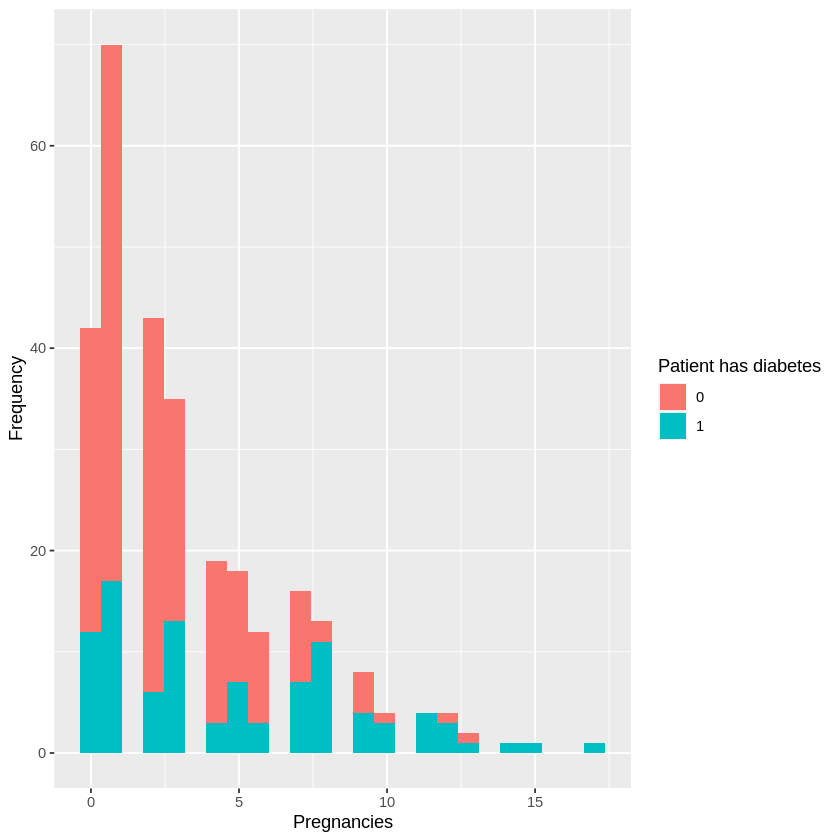

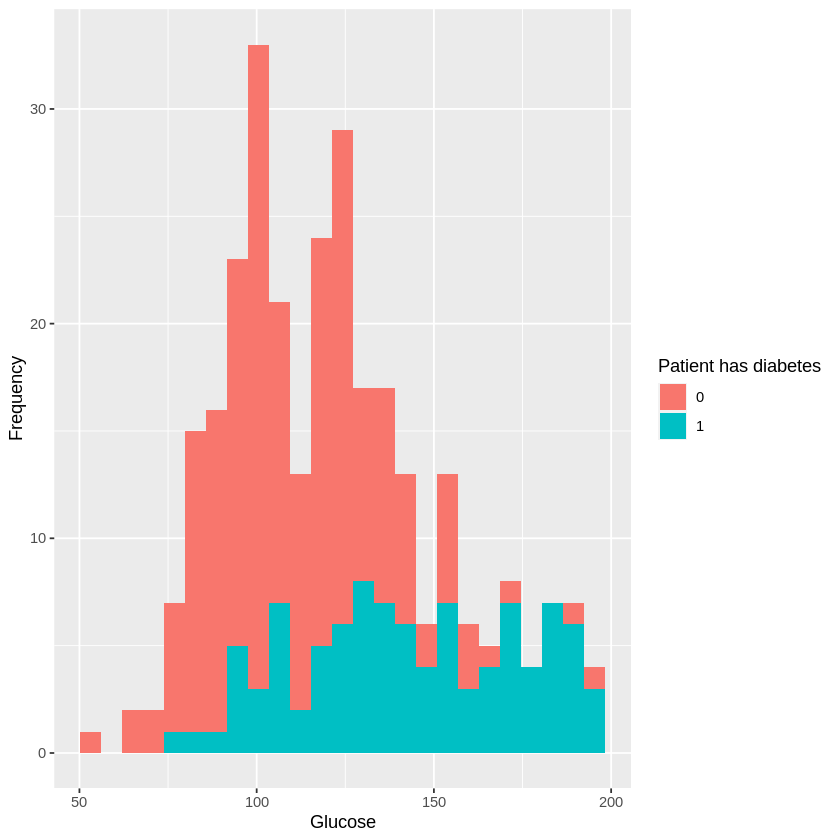

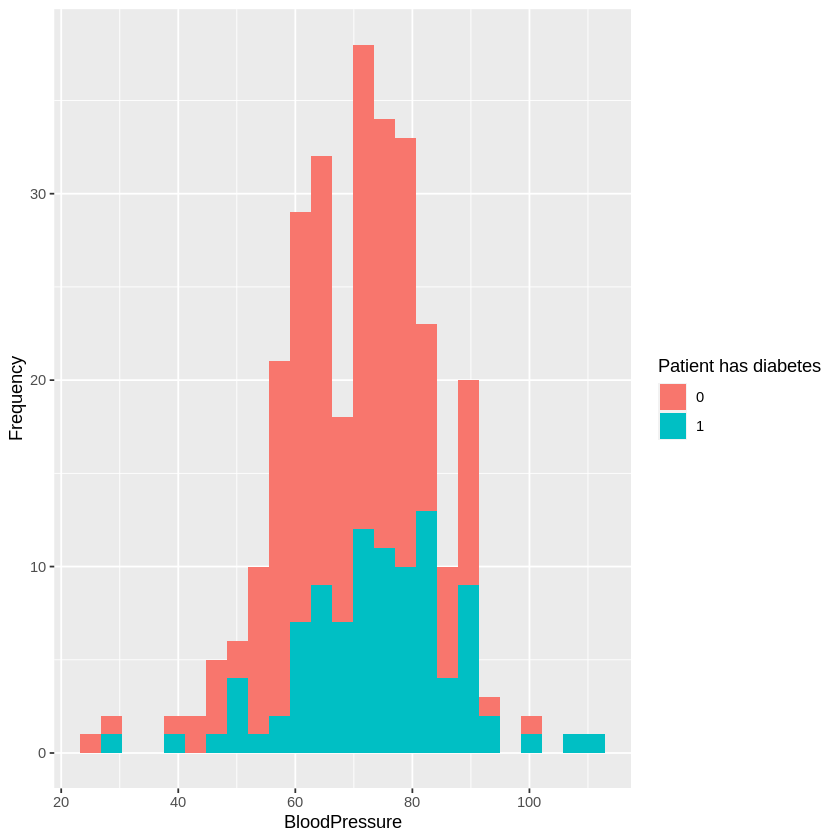

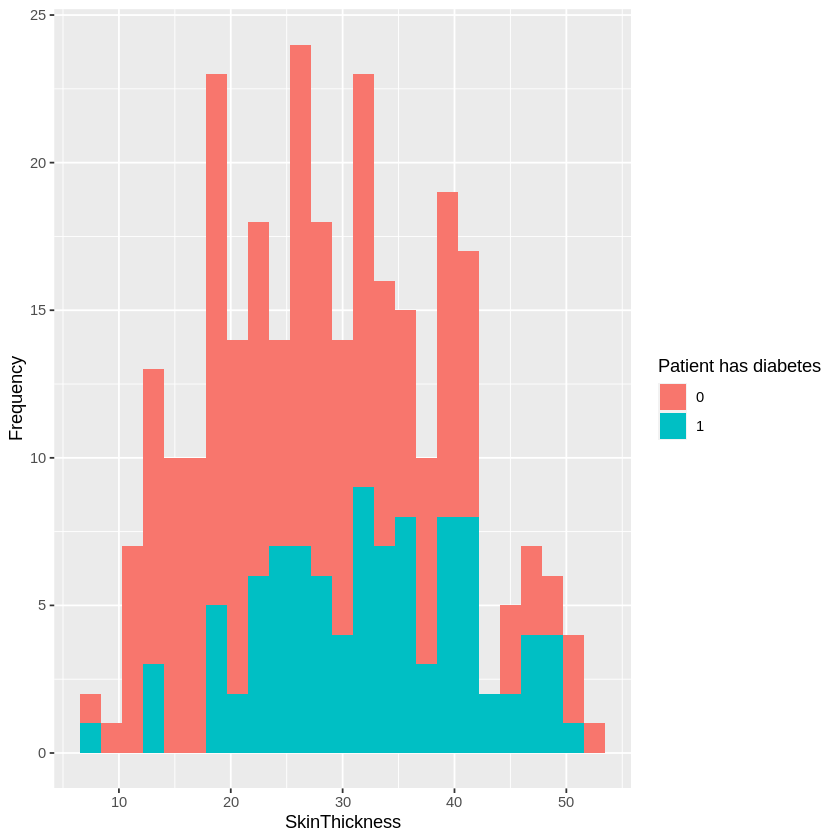

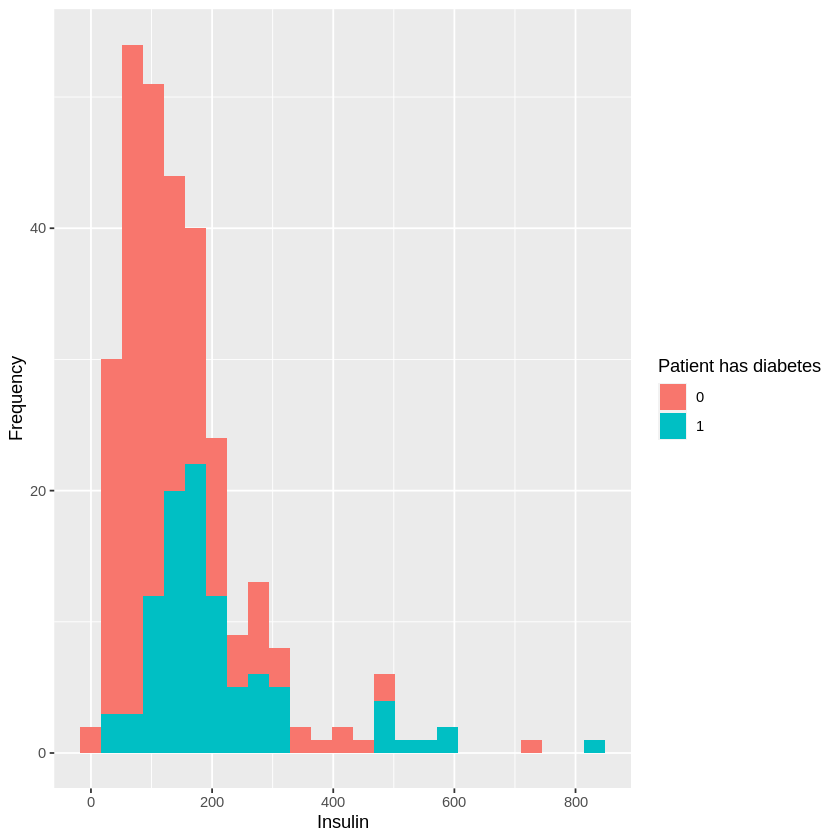

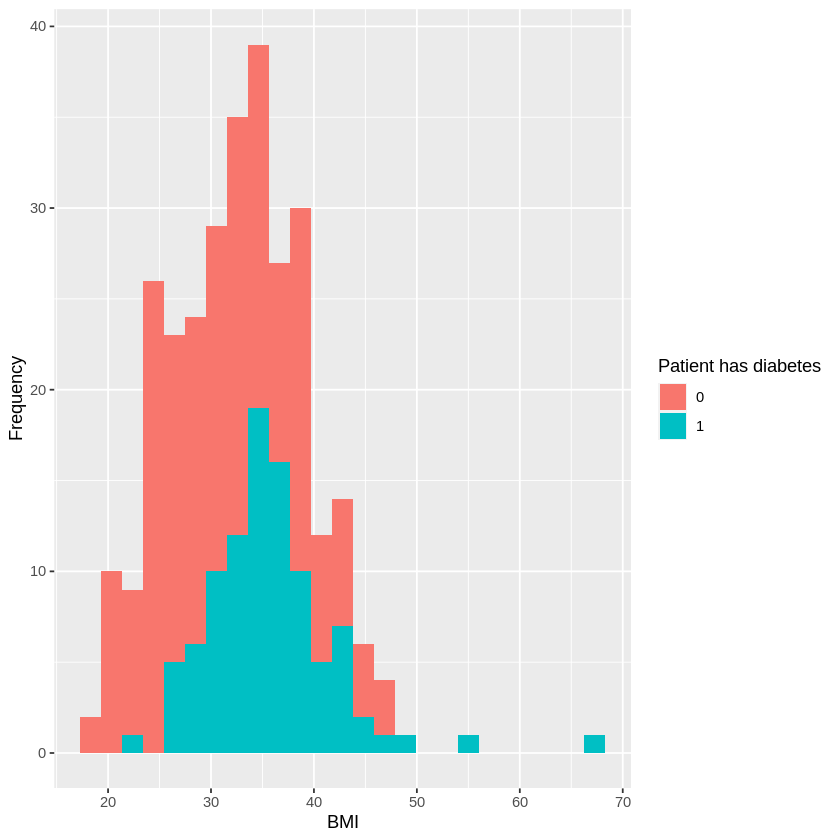

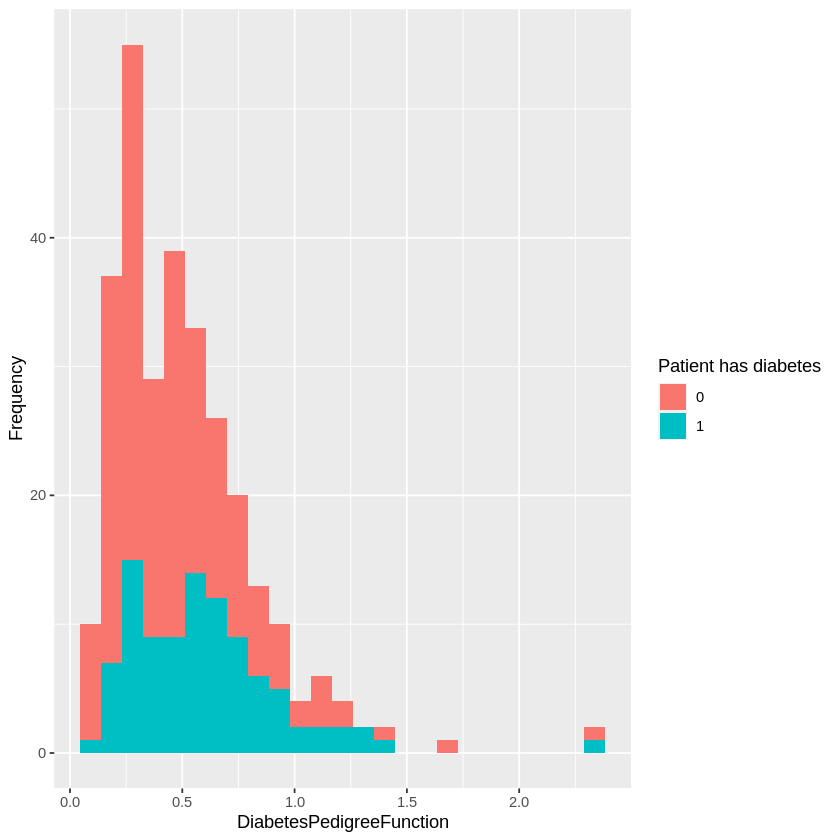

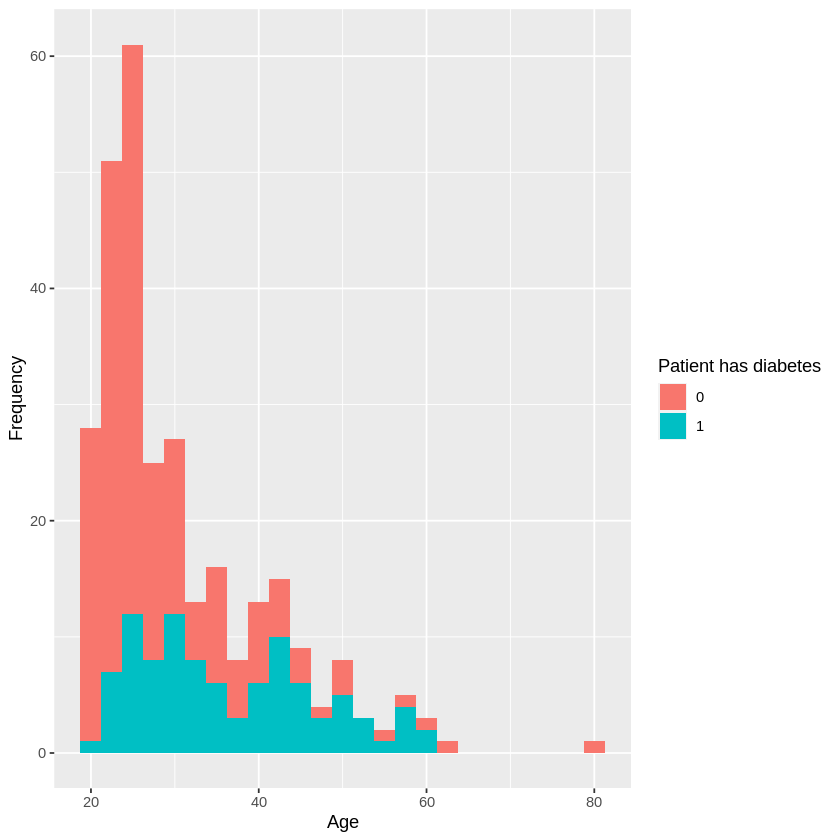

In [4]:
diabetes_training_reduced = select(diabetes_training, -Outcome)

visualization_function <- function(col_name) {
    plt <- ggplot(diabetes_training, aes_string(x=col_name, fill="Outcome")) + 
    geom_histogram(position="stack", bins=25) + 
    labs(x=col_name, y="Frequency", fill="Patient has diabetes")
    print(plt)
}


for (name in colnames(diabetes_training_reduced)) {
    visualization_function(name)
}


As we can see from the charts above, there does not seem to be any immediate relationship between just 1 variable and the likeliness of the patient having diabetes. However, this does not help us determine the relationship between many different variables, as higher dimensional relationships are difficult to visualize. We will see if any clusters form after running KNN. 

### Expected Outcomes and Significance

We expect that the given variables will be effective at predicting the presence of diabetes in novel patients. Previous studies have identified insulin levels and family history as critical in diagnosing Type 1 diabetes, while BMI, age and blood pressure are strong predictors of Type 2 (Diabetes Canada, 2022; World Health Organization, 2022). 

As of 2017, 1 in 3 Canadians is either diabetic or prediabetic, with prevalence expected to grow over 40% in the next ten years (Diabetes Canada, 2017). Type 2 diabetes, which accounts for 90% of patients, can be prevented or delayed with early intervention (Diabetes Canada, 2022). Early diagnosis has been shown to significantly increase life expectancy, with health improvements sustained years after the initial intervention (Diabetes Canada, 2017; Holman et al., 2008). Additionally, this could help reduce the high individual and collective costs associated with diabetes; in 2018 insulin accounted for roughly $725 per patient and 484 million of government spending (Schneider et al., 2022). 

By determining which factors are strongly predictive measures of diabetes, future studies can focus on factor interactions and longitudinal studies that evaluate the merits of tailored interventions. 

### References

Diabetes Canada. (2017). Diabetes Canada 2018 Pre-Budget Submission: 90-90-90 - Measurable change and improved productivity by 2021. Retrieved from Diabetes Canada: https://www.diabetes.ca/DiabetesCanadaWebsite/media/Advocacy-and-Policy/Submissions%20to%20Government/Federal/2018-Federal-PBS.pdf

Diabetes Canada. (2022). Assess your risk of developing diabetes. DiabetesCanadaWebsite. Retrieved October 27, 2022, from https://www.diabetes.ca/type-2-risks/risk-factors---assessments 

Diabetes Canada. (2022). What is diabetes? DiabetesCanadaWebsite. Retrieved October 27, 2022, from https://www.diabetes.ca/about-diabetes/what-is-diabetes 

Holman, R. R., Paul, S. K., Bethel, M. A., Matthews, D. R., & Neil, H. A. (2008). 10-year follow-up of intensive glucose control in type 2 diabetes. New England Journal of Medicine, 359(15), 1577–1589. https://doi.org/10.1056/nejmoa0806470 

Schneider, T., Gomes, T., Hayes, K. N., Suda, K. J., & Tadrous, M. (2022). Comparisons of insulin spending and price between Canada and the United States. Mayo Clinic Proceedings, 97(3), 573–578. https://doi.org/10.1016/j.mayocp.2021.11.028 

World Health Organization. (2022, September 16). Diabetes. World Health Organization. Retrieved October 27, 2022, from https://www.who.int/news-room/fact-sheets/detail/diabetes 